In [6]:

import pickle
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd

In [7]:
# Load the pickle file
model = load_model('../pickle_files/model.h5')

# open scaler pickle
with open('../pickle_files/standscaler.pkl', 'rb') as file:
    scaler = pickle.load(file=file)
    
# open scaler pickle
with open('../pickle_files/gender_label_encoder.pkl', 'rb') as file:
    gender_label_encoder = pickle.load(file=file)
    
# open scaler pickle
with open('../pickle_files/geography_oh_label_encoder.pkl', 'rb') as file:
    geography_oh_label_encoder = pickle.load(file=file)

In [49]:
input_data = {
    "CreditScore": 619,
    "Geography": "France",
    "Gender": "Female",
    "Age": 42,
    "Tenure": 2,
    "Balance": 0.0,
    "NumOfProducts": 1,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 101348.88
}

input_data = pd.DataFrame([input_data])
input_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [ ]:
gender = gender_label_encoder.transform([input_data["Gender"]])[0]
geography_encoded = geography_oh_label_encoder.transform([input_data["Geography"]])
geography = pd.DataFrame(
    geography_encoded,
    columns=geography_oh_label_encoder.get_feature_names_out(['Geography'])
)
input_data = input_data.drop(columns=["Geography"])
input_data = pd.concat([input_data.reset_index(drop=True), geography], axis=1)
input_data['Gender'] = gender

e:\End to End ML Project\venv\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [53]:
input_data = scaler.transform(input_data)
input_data

e:\End to End ML Project\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-6.76613985, -3.2940038 , -3.67006334, -2.09821105, -1.21849007,
        -4.22321125, -0.11888692,  0.92443458, -1.74616545,  1.00450338,
        -1.91524949, -1.90861117]])

In [58]:
prediction = model.predict(input_data)[0][0]
if prediction>0.5:
    print("This Customer want churn")
else:
    print("This Customer don't want churn")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
This Customer don't want churn


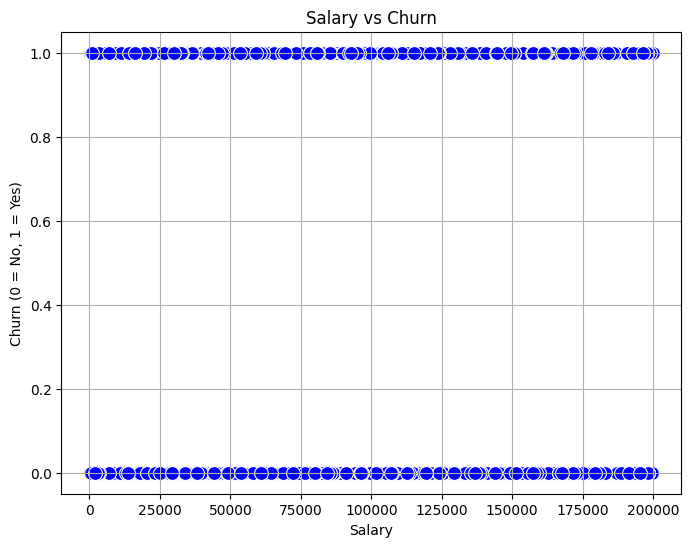

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../Data/Churn_Modelling.csv')
plt.figure(figsize=(8, 6))
sns.scatterplot(x="EstimatedSalary", y="Exited", data=data, s=100, color='b')
plt.title("Salary vs Churn")
plt.xlabel("Salary")
plt.ylabel("Churn (0 = No, 1 = Yes)")
plt.grid(True)
plt.show()


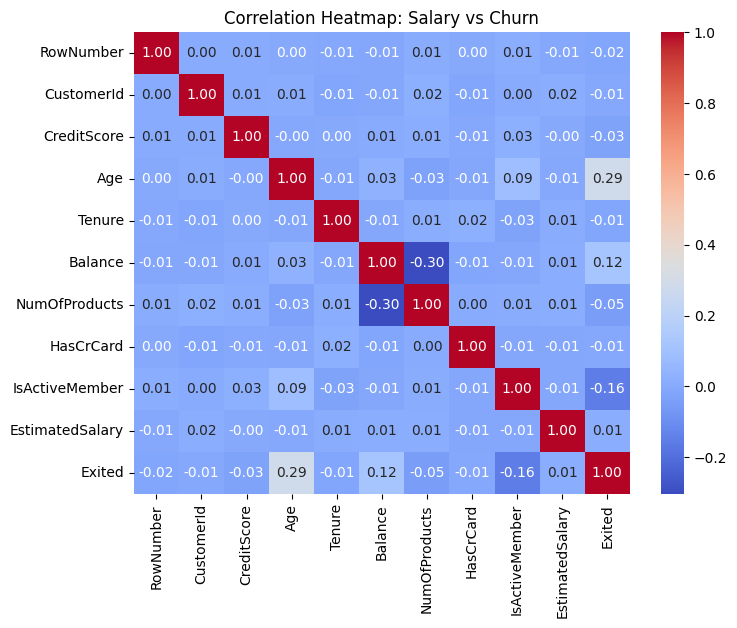

In [68]:
numeric_col = data.select_dtypes(include='number')
correlation_matrix = numeric_col.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap: Salary vs Churn")
plt.show()